# Criação de um wordcloud com palavras de um artigo

Inspirado pelas informações presentes nos seguintes links:

https://carolinescholles.com/br/nuvem-de-palavras-em-python/

https://amueller.github.io/word_cloud/auto_examples/colored.html

In [1]:
#!pip install newspaper3k
#!pip install wordcloud
#!pip install Pillow

In [2]:
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
# Importando as palavras do artigo

from newspaper import Article
article = Article('https://pt.wikivoyage.org/wiki/Fortaleza', 'pt-br')
article.download()
article.parse()

In [4]:
# Definindo palavras que não serão utilizadas

STOPWORDS = ['é','à', 'às','Tel', 'e','o', 'editar', 'rua', 'que','ver', 'resumo','principal','essa','vez','nas','mas','qual',
             'principal','ele','ter','doença','pois','este', 'Av',
             'vez','ver principal','artigo principal','já','aos','pode','outro','artigo','desse','alguns','meio',
             'entre','das','podem','esse','seu','também','são','quando','de', 'que','em','os','as','da','como',
             'dos','ou','se','um','uma','para','na','ao','mais','por','não','ainda','muito','sua'] + list(STOPWORDS)

A imagem utilizada foi manipulada para exibir apenas um perfil em preto de uma jangada.

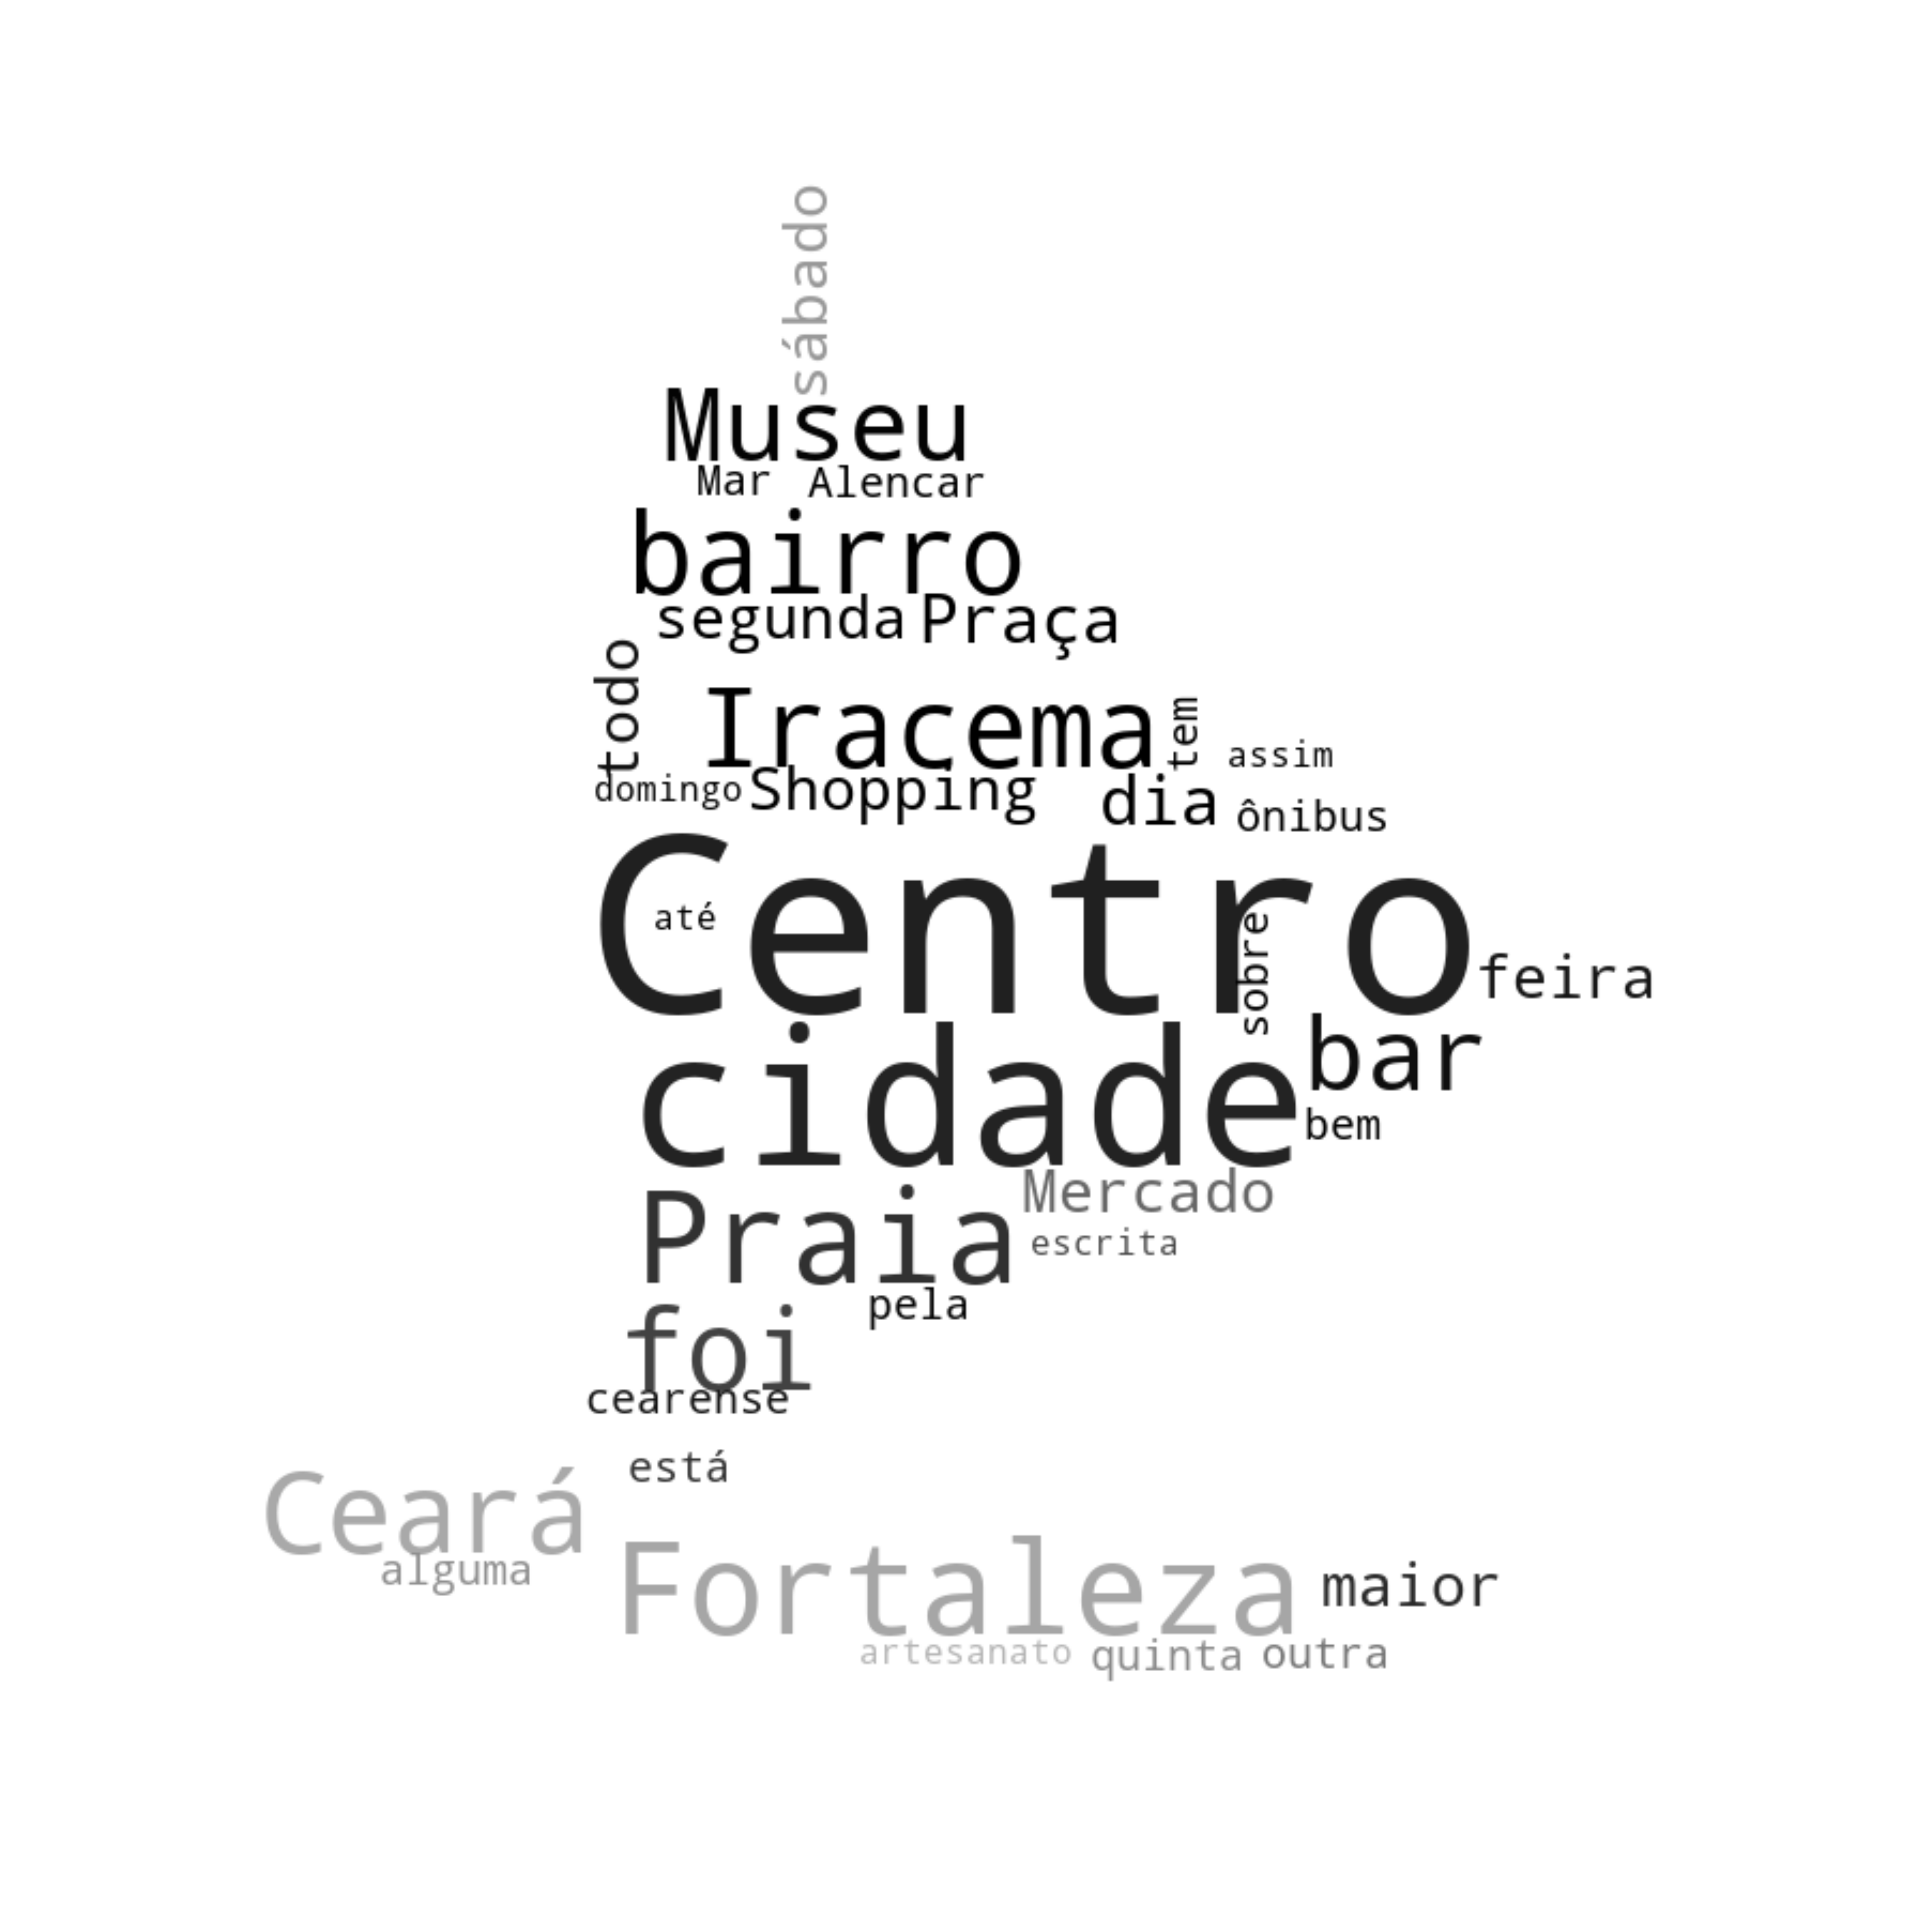

In [5]:
# Criando a matriz de cores

image_color =np.array(Image.open("content/jangada_s_black.jpg"))
mask_colors = ImageColorGenerator(image_color)


# Criando a Nuvem de palavras
wc = WordCloud(stopwords=STOPWORDS,
               mask= image_color, 
               background_color="white",
               max_words=2000, 
               max_font_size=40,
               random_state=42, 
               width= image_color.shape[1],
               height= image_color.shape[0],
               scale = 4,                         #adicionei o parâmetro scale para melhorar a qualidade
               color_func=mask_colors)
wc.generate(article.text)
plt.figure( figsize=(90,160) )                    #ajustar tamanho da imagem
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('content/jangaword.jpg')

Essa outra nuvem de palavras foi baseada na imagem anterior, mas com as cores invertidas

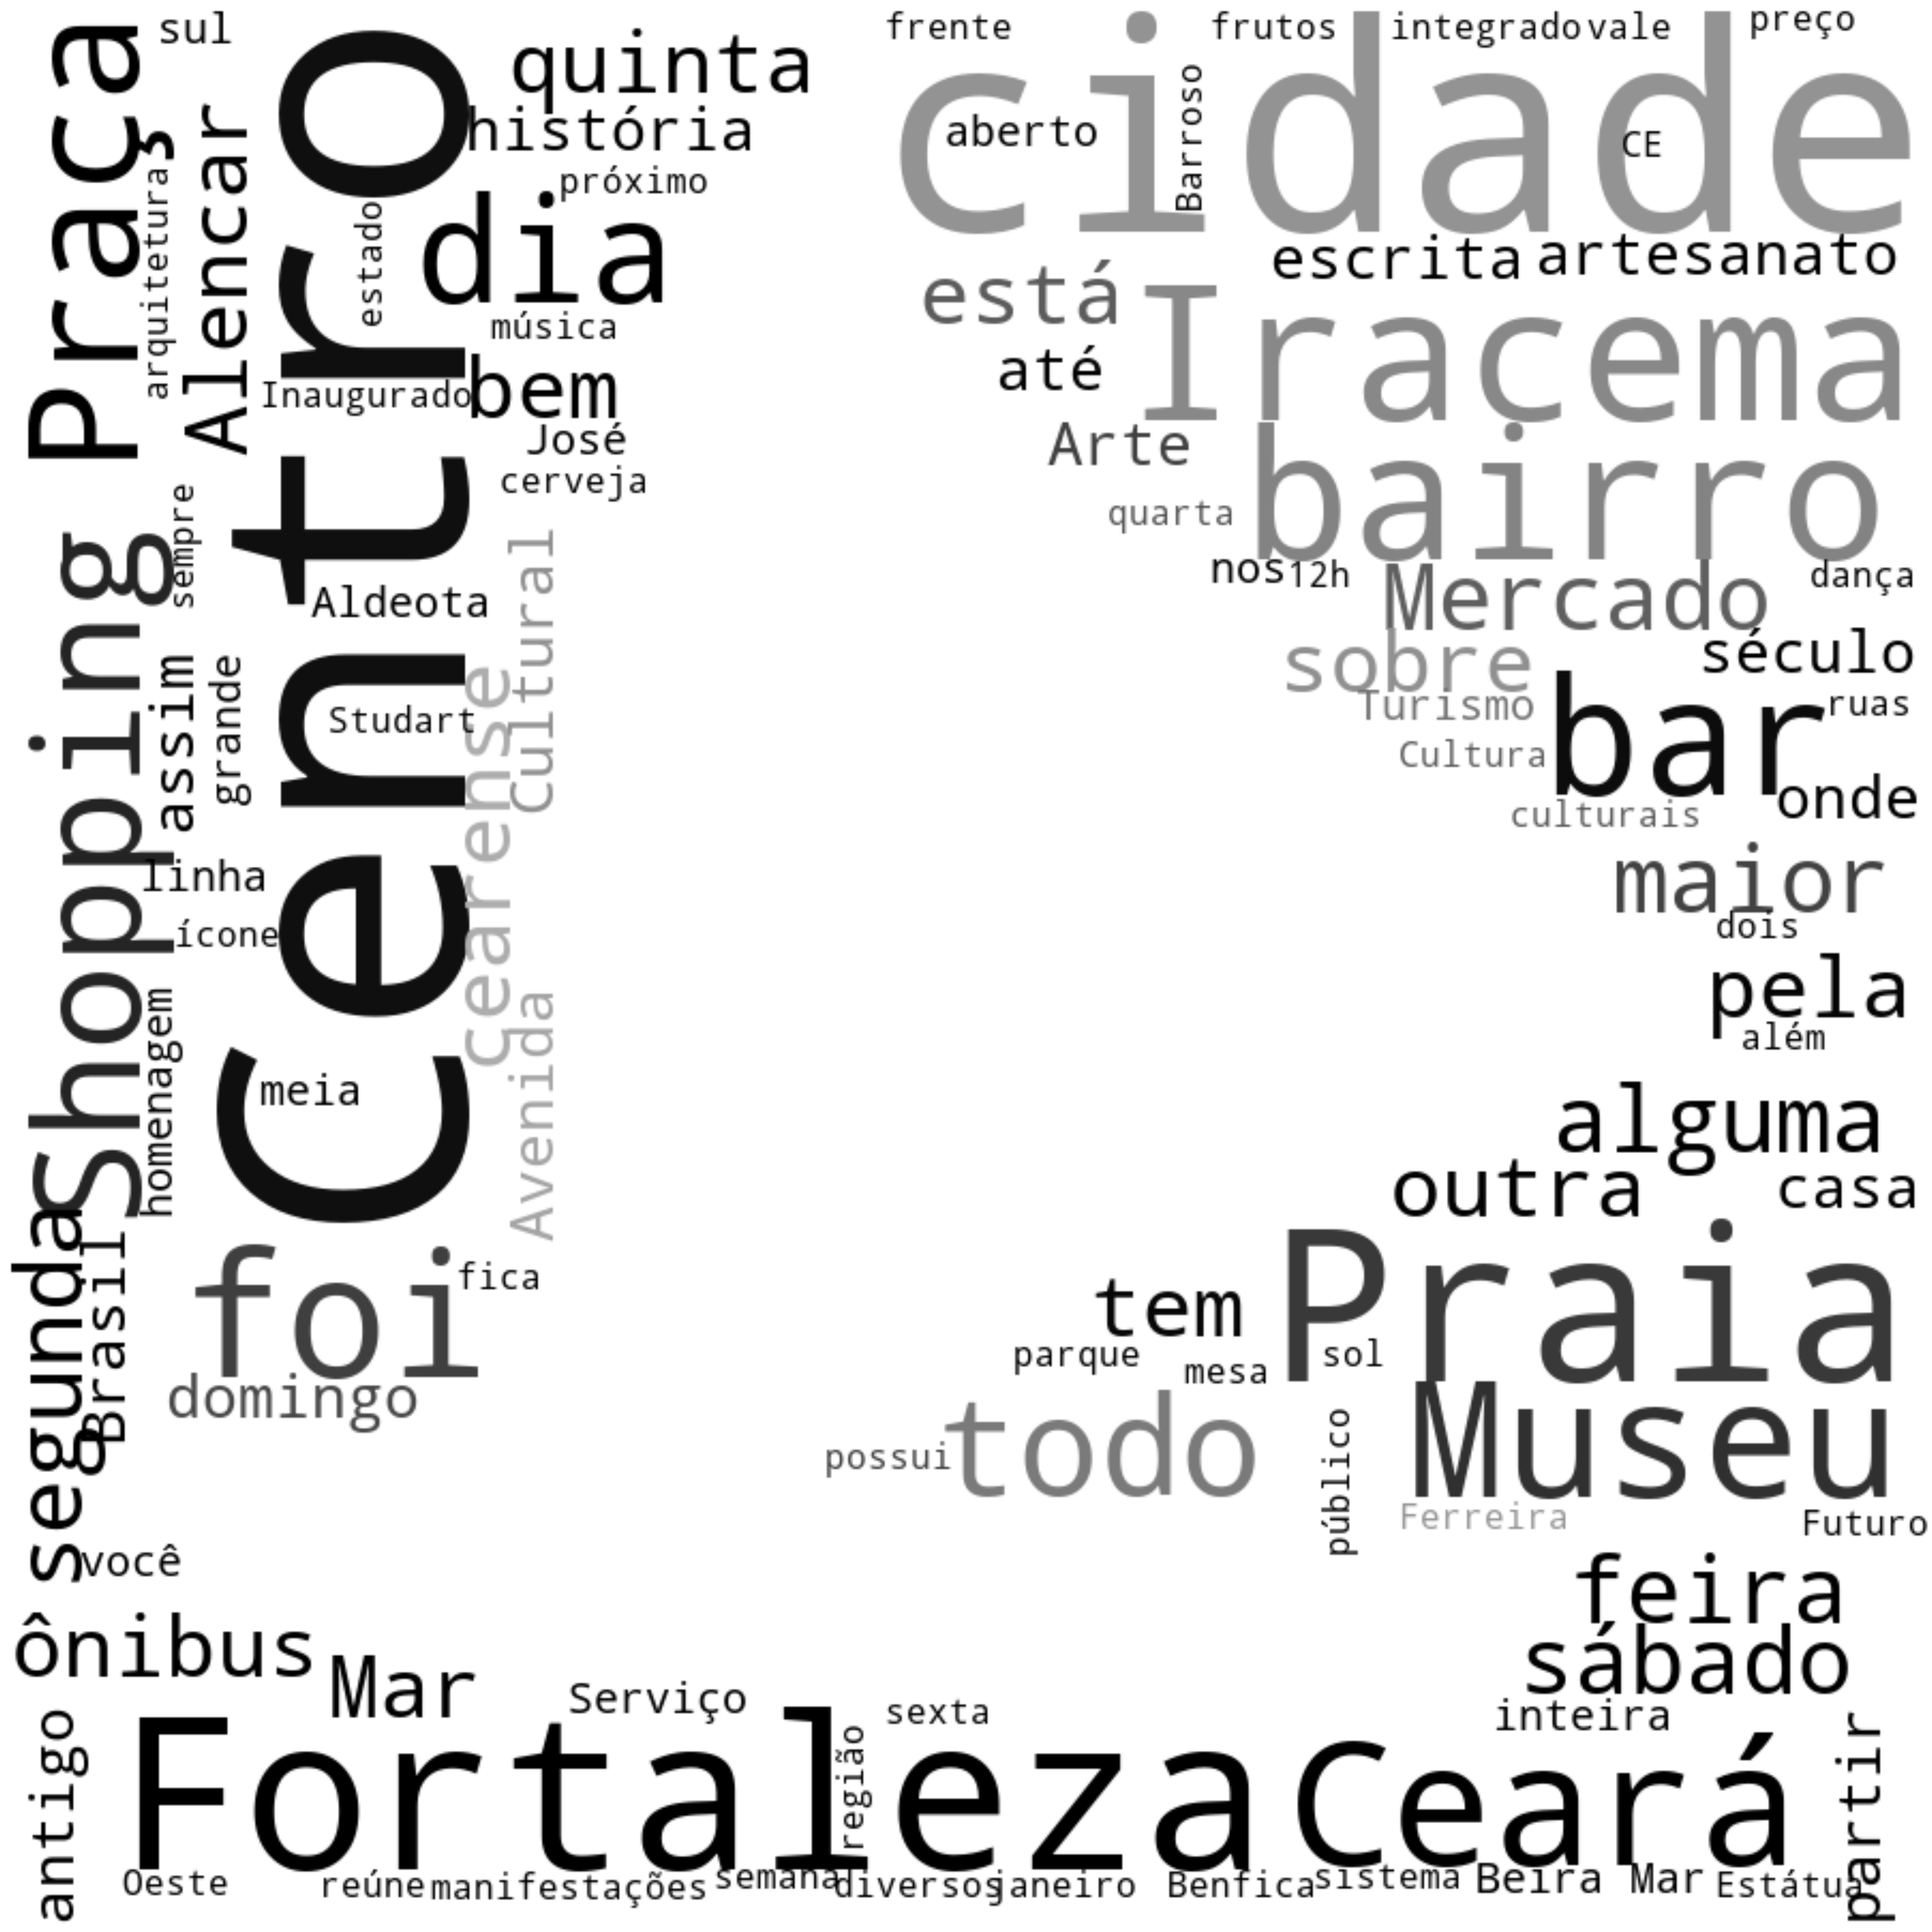

In [6]:
image_color =np.array(Image.open("content/jangada_s_black2.jpg"))
mask_colors = ImageColorGenerator(image_color)

wc = WordCloud(stopwords=STOPWORDS,
               mask= image_color, 
               background_color="white",
               max_words=2000, 
               max_font_size=40,
               random_state=42, 
               width= image_color.shape[1],
               height= image_color.shape[0],
               scale = 4,                         #adicionei o parâmetro scale para melhorar a qualidade
               color_func=mask_colors)
wc.generate(article.text)
plt.figure( figsize=(90,160))                     #ajustar da tamanho imagem  
plt.imshow(wc, interpolation="bilinear")
plt.axis('off')
plt.savefig('content/jangaword2.jpg')